In [ ]:
#teradata connection with python using odbc driver
#dont run this ,it will not work
import teradata
import pandas as pd
host,user,pwd = '10.132.4.11','tvimal', "Jimmy@12"
udaExec = teradata.UdaExec (appName="HelloWorld", version="1.0",logConsole=False)
with udaExec.connect(method="ODBC", system=host,username=user,password=pwd) as session:
    query = '''SELECT * from DD_ADHOC.SA_Model_CC_PL_TRAINING'''
    df1 = pd.read_sql(query,session)
df1.shape

In [2]:
#importing required libraries
import numpy as np
import pandas as pd
import keras
import seaborn as sns
from keras.layers import Dense
from sklearn  import metrics
from keras.models import Sequential
from sklearn.pipeline import Pipeline
from sklearn.utils import shuffle
from keras.layers.core import Dropout
from keras import regularizers
from keras.callbacks import EarlyStopping 
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from  sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import train_test_split

C:\Users\tvimal\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\tvimal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
df=pd.read_excel('C:\\Users\\tvimal\\Desktop\\EtoE\\training_data7500.xlsx')

In [63]:
print(df.shape)
df.columns

(7500, 28)


Index(['CIFNO', 'SCV_Party_ID', 'Age_Band', 'Gender', 'Occupation_Group',
       'Gross_Annual_Income', 'Ethnic', 'Marital_status', 'Seg_Locality',
       'No_of_Prod_Held_BW', 'f_OtherProd', 'Open_PL_Jul17Jun18',
       'casa_outflow_123m', 'outflow avg_3m', 'casa_outflow_456m',
       'outflow avg_6m', 'outflow_behav_change', 'casa_inflow_123m',
       'inflow avg_3m', 'casa_inflow_456m', 'inflow avg_6m',
       'inflow_behav_change', 'MERCHANT_CNT', 'DC_TXN_CNT', 'DC_TXN_AMT',
       'MERCHANT_CNT_SUCCESS_RATE', 'pl_applied_month',
       'Applied_PL_Jul17Jun18'],
      dtype='object')

In [95]:
df1['Open_PL_Jul17Jun18'].value_counts()

0    7168
1     332
Name: Open_PL_Jul17Jun18, dtype: int64

In [64]:
df1=df.drop(['pl_applied_month','Applied_PL_Jul17Jun18','CIFNO',],axis=1)
#df1[~df1['SCV_Party_ID'].isin(test_data['SCV_Party_ID'])]

In [ ]:
#column "Target " is the output variable

In [61]:
df1=df1.rename(columns={'Open_PL_Jul17Jun18':'TARGET'})

In [12]:
pd.crosstab(df1['Occupation_Group'],df1['TARGET'],margins=True)
df1.groupby(['Occupation_Group','TARGET']).size()
df1.pivot_table(index='Occupation_Group', columns='TARGET', aggfunc=len)
pd.crosstab(df1.Occupation_Group, df1.TARGET).mean()

TARGET
0    551.384615
1     25.538462
dtype: float64

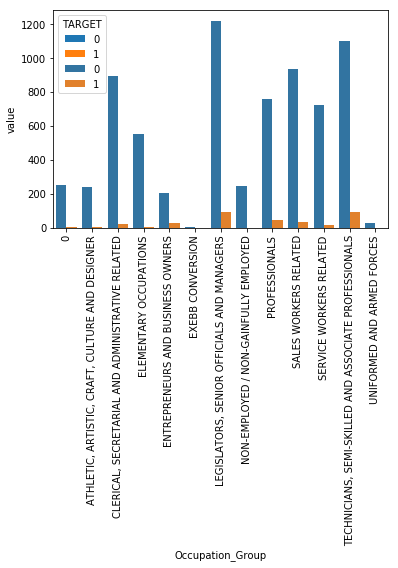

In [13]:
ct=pd.crosstab(df1.Occupation_Group,df1.TARGET)
ct.plot.bar(stacked=False)
import seaborn as sns
# now stack and reset
stacked = ct.stack().reset_index().rename(columns={0:'value'})
# plot grouped bar chart
sns.barplot(x=stacked.Occupation_Group, y=stacked.value, hue=stacked.TARGET)
#ct.plot.bar(stacked=True)

Null Hypothesis test for significant variables

In [15]:
#chi square test for output variable with input categorical features
table = pd.crosstab(index=df1['Occupation_Group'], columns=df1['TARGET'])
table
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(table)
stat, p, dof, expected 
#p value is less than 0.05 so its a significant variable

(158.13972166356808,
 1.2567651407245764e-27,
 12,
 array([[2.45623467e+02, 1.13765333e+01],
        [2.31287467e+02, 1.07125333e+01],
        [8.79274667e+02, 4.07253333e+01],
        [5.30432000e+02, 2.45680000e+01],
        [2.20774400e+02, 1.02256000e+01],
        [3.82293333e+00, 1.77066667e-01],
        [1.25296640e+03, 5.80336000e+01],
        [2.37021867e+02, 1.09781333e+01],
        [7.70321067e+02, 3.56789333e+01],
        [9.24194133e+02, 4.28058667e+01],
        [7.06286933e+02, 3.27130667e+01],
        [1.13732267e+03, 5.26773333e+01],
        [2.86720000e+01, 1.32800000e+00]]))

In [17]:
#f_anova test for one continous variable and one categorical variable 
#here categorical output and continuos output
import numpy as np
from scipy.stats import ttest_ind
from scipy import stats
tt=df1[['TARGET','casa_inflow_123m']]
tt.groupby('TARGET').mean()
tt=tt.replace(np.nan,0)
tt=tt.replace(np.inf,0)
tt=tt.replace(-np.inf,0)
cat1 = tt[tt['TARGET']==0]
cat2 =tt[tt['TARGET']==1]
stats.f_oneway(cat1['casa_inflow_123m'], cat2['casa_inflow_123m'])

F_onewayResult(statistic=0.36528155000839785, pvalue=0.5456058160909737)

In [18]:
#t_test only for when number of samples less than 30 (one categorical var and one continuos var)
from scipy.stats import ttest_ind
tt=df1[['TARGET', 'casa_outflow_123m']]
tt.groupby('TARGET').mean()
tt=tt.replace(np.nan,0)
tt=tt.replace(np.inf,0)
tt=tt.replace(-np.inf,0)
cat1 = tt[tt['TARGET']==0]
cat2 =tt[tt['TARGET']==1]
stats.f_oneway(cat1['casa_outflow_123m'], cat2['casa_outflow_123m'])
#Z test also for categorical and continuous with more than 30 samples

F_onewayResult(statistic=0.36355249366091075, pvalue=0.5465580968656438)

correlation test

In [19]:
df1.columns

Index(['SCV_Party_ID', 'Age_Band', 'Gender', 'Occupation_Group',
       'Gross_Annual_Income', 'Ethnic', 'Marital_status', 'Seg_Locality',
       'No_of_Prod_Held_BW', 'f_OtherProd', 'TARGET', 'casa_outflow_123m',
       'outflow avg_3m', 'casa_outflow_456m', 'outflow avg_6m',
       'outflow_behav_change', 'casa_inflow_123m', 'inflow avg_3m',
       'casa_inflow_456m', 'inflow avg_6m', 'inflow_behav_change',
       'MERCHANT_CNT', 'DC_TXN_CNT', 'DC_TXN_AMT',
       'MERCHANT_CNT_SUCCESS_RATE'],
      dtype='object')

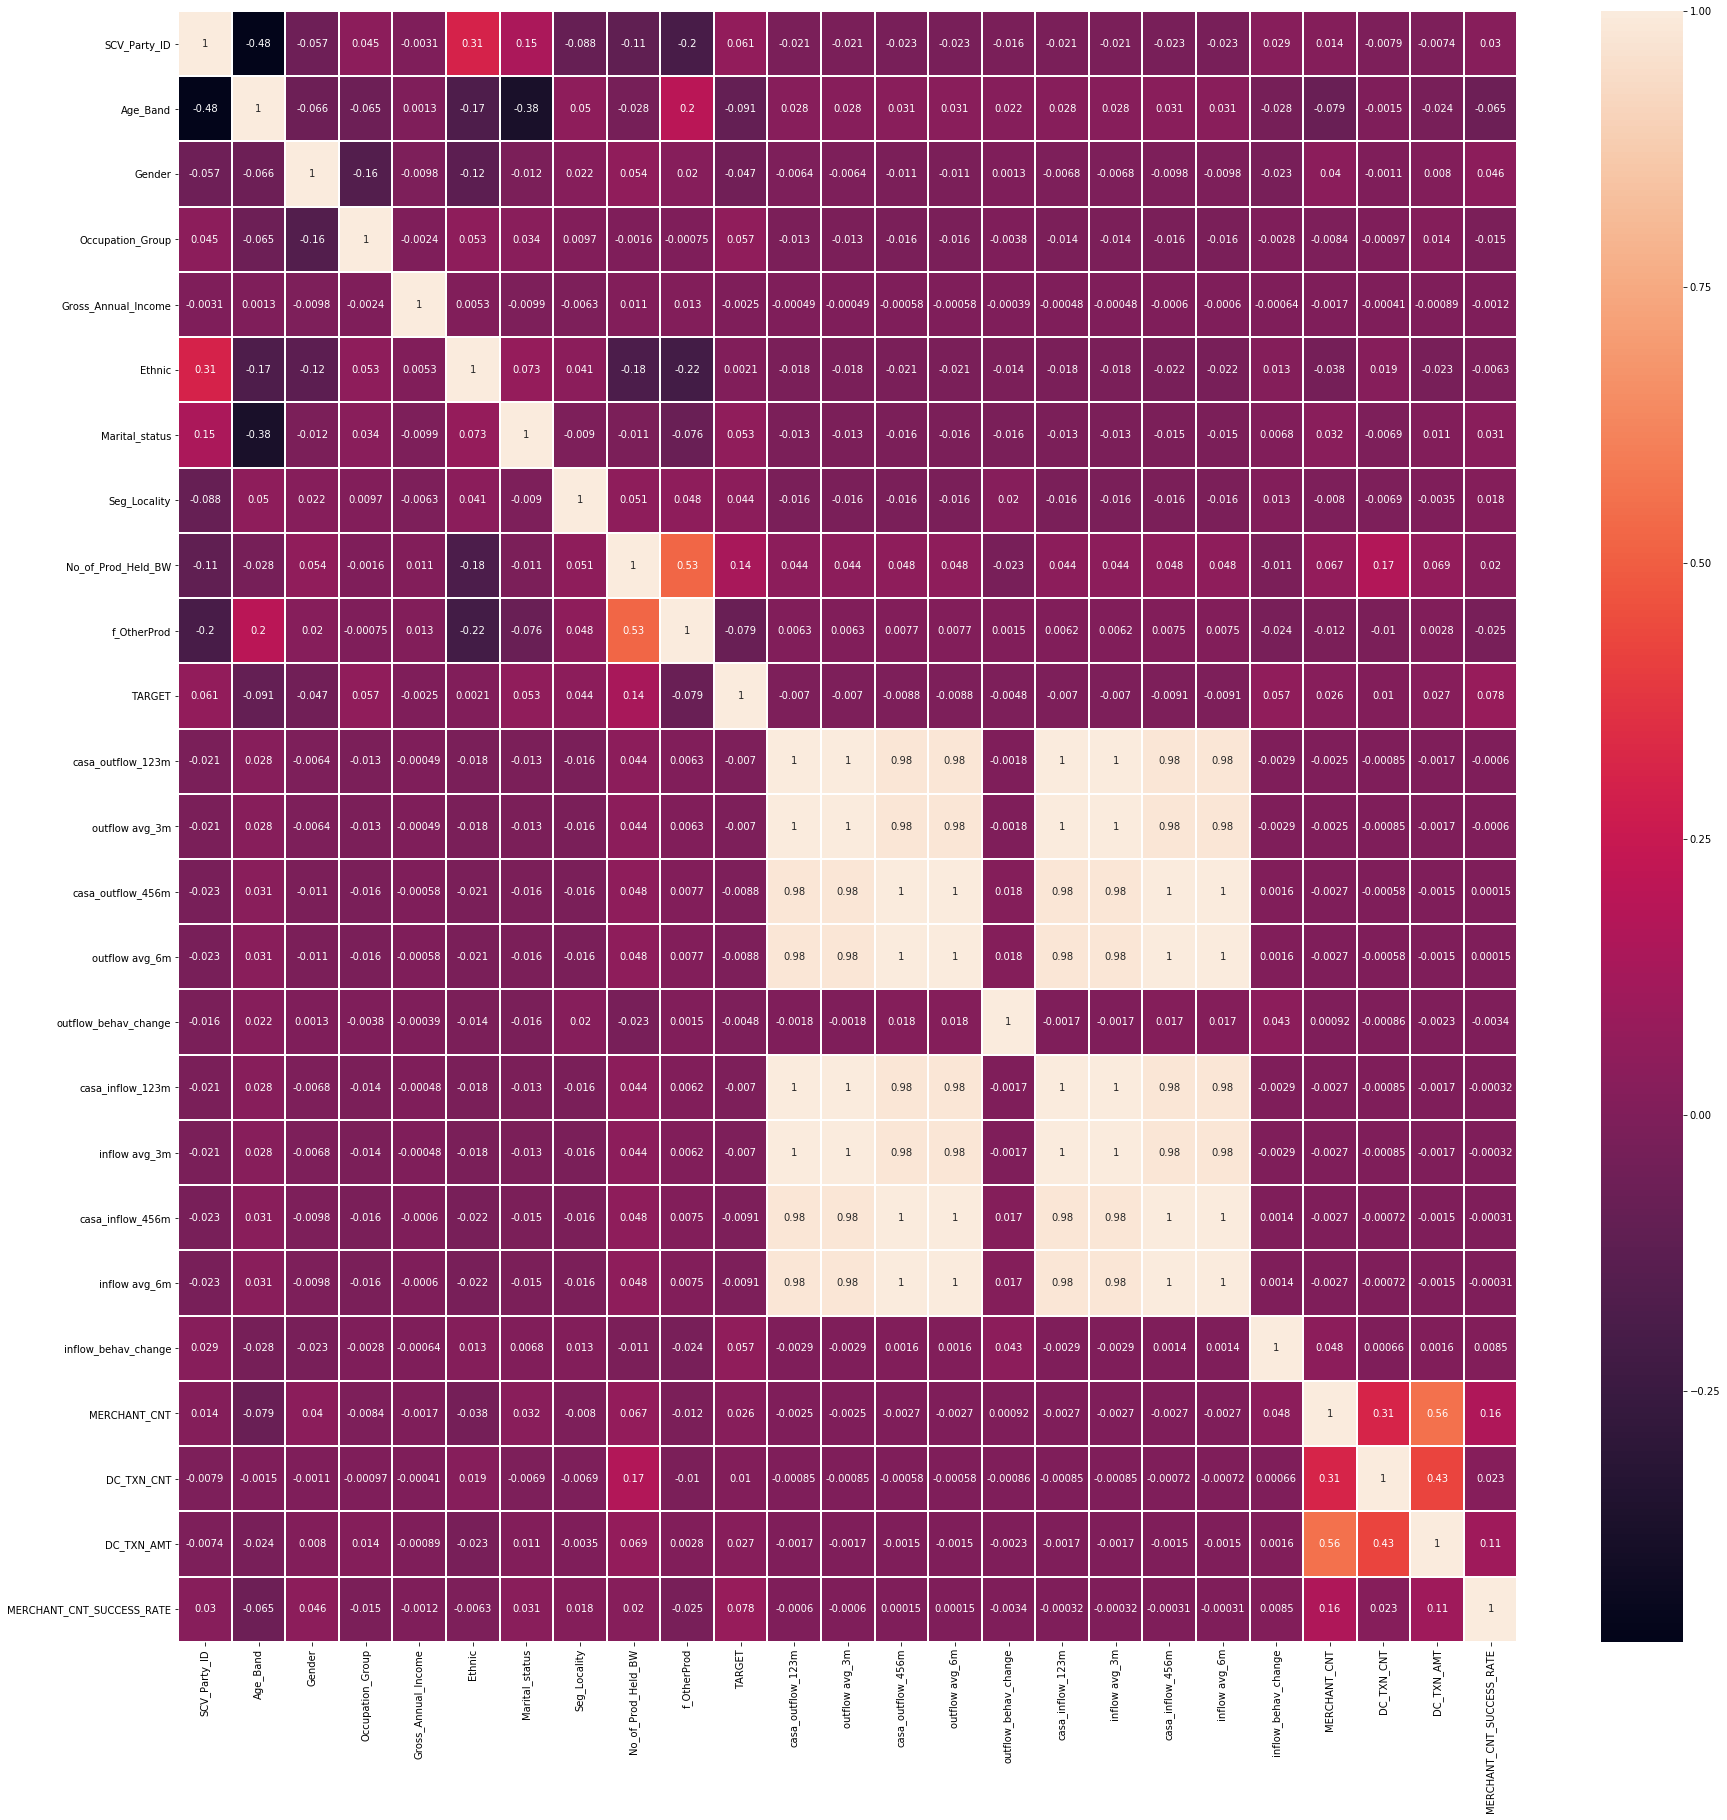

In [20]:
#Correlation betweeen the input features 
#this is one method of label encoding the categorical column
cor=df1
#factorizing the categorical values
cor['Age_Band'] = cor['Age_Band'].astype('category').cat.codes
cor['Gender'] = cor['Gender'].astype('category').cat.codes
cor['Marital_status'] = cor['Marital_status'].astype('category').cat.codes
cor['Ethnic'] = cor['Ethnic'].astype('category').cat.codes
cor['Seg_Locality'] = cor['Seg_Locality'].astype('category').cat.codes
cor['Occupation_Group'] = cor['Occupation_Group'].astype('category').cat.codes
#Correlation matrix
matrix=cor.corr( method='pearson')#corr(use any one method='pearson' or 'spearman')
#Heatmap visualisation
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (30,30))
sns.heatmap(matrix, annot=True,linewidths=1)

In [21]:
df1.columns

Index(['SCV_Party_ID', 'Age_Band', 'Gender', 'Occupation_Group',
       'Gross_Annual_Income', 'Ethnic', 'Marital_status', 'Seg_Locality',
       'No_of_Prod_Held_BW', 'f_OtherProd', 'TARGET', 'casa_outflow_123m',
       'outflow avg_3m', 'casa_outflow_456m', 'outflow avg_6m',
       'outflow_behav_change', 'casa_inflow_123m', 'inflow avg_3m',
       'casa_inflow_456m', 'inflow avg_6m', 'inflow_behav_change',
       'MERCHANT_CNT', 'DC_TXN_CNT', 'DC_TXN_AMT',
       'MERCHANT_CNT_SUCCESS_RATE'],
      dtype='object')

In [26]:
#we can use this method for label encoding
#another way to factorise to make a corr()
num_vars=df1[['SCV_Party_ID','Gross_Annual_Income','No_of_Prod_Held_BW','f_OtherProd','casa_outflow_123m',
       'outflow avg_3m', 'casa_outflow_456m', 'outflow avg_6m','DC_TXN_CNT', 'DC_TXN_AMT','outflow_behav_change',
      'casa_inflow_123m', 'inflow avg_3m', 'casa_inflow_456m', 'inflow avg_6m', 'inflow_behav_change','MERCHANT_CNT',    'MERCHANT_CNT_SUCCESS_RATE']]

cat_vars=df1[['SCV_Party_ID','Age_Band','Gender','Occupation_Group','Marital_status','Seg_Locality','Ethnic']]
tar_var=df1[['SCV_Party_ID','TARGET']]
#factorise categorical variables
cat_v=(cat_vars.apply(lambda x: pd.factorize(x)[0]))
#now concat all the variables
data=pd.concat([cat_v,num_vars,tar_var],axis=1)
#data contains three cifno
dat=data.drop(['SCV_Party_ID','SCV_Party_ID'],axis=1)
datt=shuffle(dat)
datt.corr()

,Age_Band,Gender,Occupation_Group,Marital_status,Seg_Locality,Ethnic,Gross_Annual_Income,No_of_Prod_Held_BW,f_OtherProd,casa_outflow_123m,...,DC_TXN_AMT,outflow_behav_change,casa_inflow_123m,inflow avg_3m,casa_inflow_456m,inflow avg_6m,inflow_behav_change,MERCHANT_CNT,MERCHANT_CNT_SUCCESS_RATE,TARGET
Age_Band,1.000000,0.043696,0.080043,-0.073280,0.001069,-0.027758,-0.003714,-0.060969,0.045816,0.001663,...,-0.007395,0.013179,0.001146,0.001146,0.000648,0.000648,-0.013159,-0.001888,0.007829,-0.030160
Gender,0.043696,1.000000,0.193066,0.014101,-0.014952,0.008579,0.009844,-0.053748,-0.020317,0.006437,...,-0.008037,-0.001289,0.006778,0.006778,0.009803,0.009803,0.022964,-0.039677,-0.045813,0.046603
Occupation_Group,0.080043,0.193066,1.000000,-0.051754,-0.012937,-0.030936,-0.002617,-0.140917,-0.069659,-0.015951,...,-0.007737,-0.001123,-0.016141,-0.016141,-0.015644,-0.015644,0.002649,-0.025662,-0.031212,-0.070663
Marital_status,-0.073280,0.014101,-0.051754,1.000000,0.011320,-0.010085,-0.010007,-0.011155,-0.077222,-0.012957,...,0.011773,-0.016070,-0.012582,-0.012582,-0.015066,-0.015066,0.007028,0.033118,0.031976,0.049543
Seg_Locality,0.001069,-0.014952,-0.012937,0.011320,1.000000,0.043238,0.005402,-0.004077,-0.020729,-0.006425,...,-0.020007,-0.018389,-0.006751,-0.006751,-0.005931,-0.005931,-0.012267,-0.018807,0.017386,0.004685
Ethnic,-0.027758,0.008579,-0.030936,-0.010085,0.043238,1.000000,0.013118,0.007645,-0.044391,-0.009277,...,-0.013849,-0.005354,-0.009235,-0.009235,-0.011574,-0.011574,-0.016113,-0.003243,0.017673,0.074462
Gross_Annual_Income,-0.003714,0.009844,-0.002617,-0.010007,0.005402,0.013118,1.000000,0.011214,0.012751,-0.000485,...,-0.000888,-0.000389,-0.000481,-0.000481,-0.000598,-0.000598,-0.000643,-0.001680,-0.001203,-0.002477
No_of_Prod_Held_BW,-0.060969,-0.053748,-0.140917,-0.011155,-0.004077,0.007645,0.011214,1.000000,0.526622,0.043801,...,0.068841,-0.023354,0.043998,0.043998,0.048326,0.048326,-0.011467,0.067121,0.019732,0.137011
f_OtherProd,0.045816,-0.020317,-0.069659,-0.077222,-0.020729,-0.044391,0.012751,0.526622,1.000000,0.006303,...,0.002770,0.001520,0.006230,0.006230,0.007532,0.007532,-0.024322,-0.011989,-0.025477,-0.079313
casa_outflow_123m,0.001663,0.006437,-0.015951,-0.012957,-0.006425,-0.009277,-0.000485,0.043801,0.006303,1.000000,...,-0.001694,-0.001785,0.998738,0.998738,0.980894,0.980894,-0.002860,-0.002547,-0.000596,-0.006963


outlier detection

In [28]:
#remove outliers using z Score
#before z score methd convert all the cate var into numbers
import numpy as np
from scipy import stats
after_outliers=datt[(np.abs(stats.zscore(datt)) <3).all(axis=1)]
after_outliers

C:\Users\tvimal\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """


,Age_Band,Gender,Occupation_Group,Marital_status,Seg_Locality,Ethnic,Gross_Annual_Income,No_of_Prod_Held_BW,f_OtherProd,casa_outflow_123m,...,DC_TXN_AMT,outflow_behav_change,casa_inflow_123m,inflow avg_3m,casa_inflow_456m,inflow avg_6m,inflow_behav_change,MERCHANT_CNT,MERCHANT_CNT_SUCCESS_RATE,TARGET


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


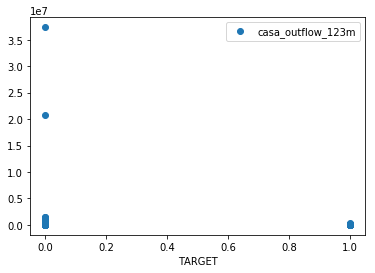

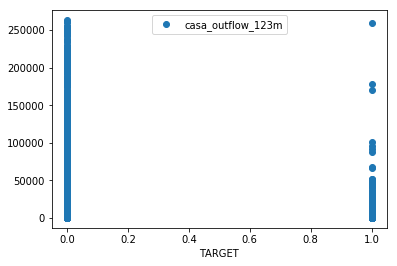

In [32]:
#quantile method for outlier detection and removal
#remove outliers based on this visuals set the various quantile for differnt variables
tt=df1[['casa_outflow_123m','TARGET']]
print(tt.plot(x='TARGET', y='casa_outflow_123m', style='o'))
q = tt['casa_outflow_123m'].quantile(0.99)
d=tt[tt['casa_outflow_123m'] < q]
print(d.plot(x='TARGET', y='casa_outflow_123m', style='o'))


In [ ]:
#sns.boxplot(x=df1['0_txn_bhv_chge_3_6m'])
Q1 = dfs.quantile(0.25)
Q3 = dfs.quantile(0.75)
IQR = Q3 - Q1
#print(IQR)
#print(dfs < (Q1 - 1.5 * IQR)) |(dfs > (Q3 + 1.5 * IQR))
df_out = dfs[~((dfs< (Q1 - 1.5 * IQR)) |(dfs > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out.shape

ValueError: range parameter must be finite.

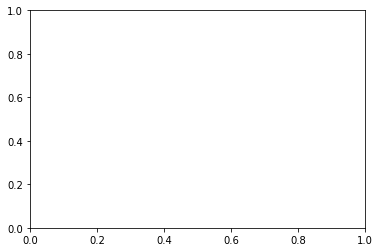

In [44]:
#see the effect of result after and before removing outliers
#result of quantile method
df1['inflow_behav_change'].hist()
#d['inflow_behav_change '].hist()

In [79]:
#########if only one side use quantile and std for two side
#these steps we have to use for all variables.
df1=df1.replace(np.nan,0)
df1=df1.replace(np.inf,0)
df1=df1.replace(-np.inf,0)
q = df1['casa_outflow_123m'].quantile(0.999)
f=df1[df1['casa_outflow_123m'] < q]

#########
q = f['casa_outflow_456m'].quantile(0.999)
g=f[f['casa_outflow_456m'] < q]

#removing outliers using standard deviation method remove outliers on two sides 

k=g[np.abs(g.inflow_behav_change - g.inflow_behav_change.mean())<=(3*g.inflow_behav_change.std())] 

aft_outliers=k[np.abs(k.outflow_behav_change - k.outflow_behav_change.mean())<=(3*k.outflow_behav_change.std())]
print(f.shape)
print(g.shape)
print(k.shape)
print(aft_outliers.shape)


(7492, 25)
(7484, 25)
(7458, 25)
(7448, 25)


Imputation

In [80]:
#after removal of outliers see the mean value and impute the values 
#if the data contains nan use fillna instead of replace
aft_outliers[ 'avg_ENR_3m'].describe()

KeyError: 'avg_ENR_3m'

In [53]:
aft_outliers.isnull().any()

SCV_Party_ID                 False
Age_Band                     False
Gender                       False
Occupation_Group             False
Gross_Annual_Income          False
Ethnic                       False
Marital_status               False
Seg_Locality                 False
No_of_Prod_Held_BW           False
f_OtherProd                  False
TARGET                       False
casa_outflow_123m            False
outflow avg_3m               False
casa_outflow_456m            False
outflow avg_6m               False
outflow_behav_change         False
casa_inflow_123m             False
inflow avg_3m                False
casa_inflow_456m             False
inflow avg_6m                False
inflow_behav_change          False
MERCHANT_CNT                 False
DC_TXN_CNT                   False
DC_TXN_AMT                   False
MERCHANT_CNT_SUCCESS_RATE    False
dtype: bool

In [82]:
aft_outliers['Age_Band']=aft_outliers[ 'Age_Band'].replace(0,'e.36-40')
aft_outliers['Gender']=aft_outliers['Gender'].replace(0,'02.Female')
aft_outliers[ 'Occupation_Group']=aft_outliers[ 'Occupation_Group'].replace(0,'PROFESSIONALS')
aft_outliers['Ethnic']=aft_outliers['Ethnic'].replace(0,'02.Malay')
aft_outliers[ 'Seg_Locality']=aft_outliers[ 'Seg_Locality'].replace(0,'PENANG ')
aft_outliers[ 'Marital_status']=aft_outliers['Marital_status'].replace(0,'02.Single')

C:\Users\tvimal\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\tvimal\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\tvimal\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [86]:
aft_outliers['outflow_behav_change'].describe()

count    7448.000000
mean        7.159786
std        75.425011
min         0.000000
25%         0.090879
50%         0.915900
75%         1.355007
max      2765.317610
Name: outflow_behav_change, dtype: float64

In [87]:
aft_outliers['Gross_Annual_Income']=aft_outliers['Gross_Annual_Income'].replace(0,7500)
aft_outliers['No_of_Prod_Held_BW']=aft_outliers['No_of_Prod_Held_BW'].replace(0,1)
aft_outliers[ 'f_OtherProd']=aft_outliers['f_OtherProd'].replace(0,0)
aft_outliers['casa_outflow_123m']=aft_outliers['casa_outflow_123m'].replace(0,16000)
aft_outliers[  'outflow avg_3m']=aft_outliers[ 'outflow avg_3m'].replace(0,3000)
aft_outliers[ 'casa_outflow_456m']=aft_outliers[ 'casa_outflow_456m'].replace(0,15000)
aft_outliers[ 'outflow avg_6m']=aft_outliers['outflow avg_6m'].replace(0,2500)
aft_outliers[ 'outflow_behav_change']=aft_outliers[ 'outflow_behav_change'].replace(0,0)
aft_outliers[ 'casa_inflow_123m']=aft_outliers[ 'casa_inflow_123m'].replace(0,0)
aft_outliers[  'inflow avg_3m']=aft_outliers[ 'inflow avg_3m'].replace(0,0)
aft_outliers[ 'casa_inflow_456m']=aft_outliers[ 'casa_inflow_456m'].replace(0,0)
aft_outliers[  'inflow avg_6m']=aft_outliers[ 'inflow avg_6m'].replace(0,0)  
aft_outliers[ 'inflow_behav_change']=aft_outliers[ 'inflow_behav_change'].replace(0,0) 

C:\Users\tvimal\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\tvimal\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\tvimal\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [96]:
x=aft_outliers.drop(['Open_PL_Jul17Jun18'],axis=1)
y=aft_outliers['Open_PL_Jul17Jun18']


In [97]:
#here we go # train the model

In [98]:
x=pd.get_dummies(x)
x.shape

(7448, 68)

In [100]:
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
#
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=0,ratio=1.0)
x_train_res,y_train_res=sm.fit_sample(x_train,y_train)
n_cols =x_train_res.shape[1]
n_cols

C:\Users\tvimal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


68

In [ ]:
#we need to save the weights for further prediction so use this simple method
#in down method i cant get the weights of the model 

In [152]:
model = Sequential()
from keras import regularizers
from keras.callbacks import EarlyStopping
EarlyStopping(monitor='val_err',patience=10)
model.add(Dense(50, input_dim=n_cols,kernel_regularizer=regularizers.l2(0.1),activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(20, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train_res,y_train_res, batch_size = 10,nb_epoch =10 ,  validation_data = (x_test, y_test))
model.get_weights()

C:\Users\tvimal\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # This is added back by InteractiveShellApp.init_path()


Train on 10704 samples, validate on 1862 samples
Epoch 1/10
10704/10704 [==============================] - 2s 203us/step - loss: 0.8367 - acc: 0.8157 - val_loss: 0.3804 - val_acc: 0.8588
Epoch 2/10
10704/10704 [==============================] - 1s 119us/step - loss: 0.3616 - acc: 0.8851 - val_loss: 0.3691 - val_acc: 0.8679
Epoch 3/10
10704/10704 [==============================] - 1s 116us/step - loss: 0.3278 - acc: 0.9014 - val_loss: 0.3212 - val_acc: 0.8856
Epoch 4/10
10704/10704 [==============================] - 1s 122us/step - loss: 0.3040 - acc: 0.9140 - val_loss: 0.3967 - val_acc: 0.8598
Epoch 5/10
10704/10704 [==============================] - 1s 117us/step - loss: 0.2852 - acc: 0.9210 - val_loss: 0.3961 - val_acc: 0.8577
Epoch 6/10
10704/10704 [==============================] - 1s 114us/step - loss: 0.2792 - acc: 0.9228 - val_loss: 0.3274 - val_acc: 0.9135
Epoch 7/10
10704/10704 [==============================] - 1s 119us/step - loss: 0.2718 - acc: 0.9311 - val_loss: 0.3519 - v

In [101]:
def create_model(optimizer='adam', init='uniform'):
    # create model
    #if verbose: print("**Create model with optimizer: %s; init: %s" % (optimizer, init) )
    model = Sequential()
    from keras import regularizers
    from keras.callbacks import EarlyStopping
    EarlyStopping(monitor='val_err',patience=10)
    model.add(Dense(50, input_dim=n_cols,kernel_regularizer=regularizers.l2(0.1),activation='relu'))
    model.add(Dropout(rate=0.2))
    model.add(Dense(20, kernel_initializer=init, activation='relu'))
    model.add(Dense(1, kernel_initializer=init, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [103]:

run_gridsearch = False

if run_gridsearch:

    epochs=[10,20,30]
    batch_size = [10, 20, 40]
    optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
    learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
    momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]#hoow much should learn from previos epoch
    init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
    activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
    weight_constraint = [1, 2, 3, 4, 5]#max 5
    dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    neurons = [1, 5, 10, 15, 20, 25, 30]# model.add(Dense(neurons, input_dim=71, kernel_initializer='normal', activation='relu'))

    model = KerasClassifier(build_fn=create_model, verbose=verbose)
    
    param_grid = dict(epochs=epochs,batch_size = batch_size,optimizer=optimizer,learn_rate = learn_rate,
                  momentum = momentum,init_mode =init_mode ,activation =activation,dropout_rate=dropout_rate, 
                  weight_constraint=weight_constraint,neurons =neurons )

    grid = GridSearchCV(estimator=model, param_grid=param_grid)
    grid_result = grid.fit(x_train,y_train)
    
    # summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    #best params
    best_epochs = grid_result.best_params_['epochs']
    best_batch_size = grid_result.best_params_['batch_size']
    best_init = grid_result.best_params_['init']
    best_optimizer = grid_result.best_params_['optimizer']
    
else:
    # pre-selected paramters
    best_epochs = 5
    best_batch_size = 5
    best_init = 'glorot_uniform'
    best_optimizer = 'rmsprop'

In [136]:
# Create a classifier with best parameters# if verbose =0 it wil not show epoch results
model_pred = KerasClassifier(build_fn=create_model, optimizer=best_optimizer, init=best_init, epochs=best_epochs, batch_size=best_batch_size, verbose=1)
model_pred.fit(x_train_res,y_train_res, validation_data = (x_test, y_test))

Train on 10704 samples, validate on 1862 samples
Epoch 1/5
10704/10704 [==============================] - 3s 304us/step - loss: 0.6484 - acc: 0.8400 - val_loss: 0.3117 - val_acc: 0.8985
Epoch 2/5
10704/10704 [==============================] - 2s 209us/step - loss: 0.3521 - acc: 0.8939 - val_loss: 0.3930 - val_acc: 0.8684
Epoch 3/5
10704/10704 [==============================] - 2s 207us/step - loss: 0.3387 - acc: 0.9020 - val_loss: 0.3754 - val_acc: 0.8813
Epoch 4/5
10704/10704 [==============================] - 2s 214us/step - loss: 0.3328 - acc: 0.9036 - val_loss: 0.3622 - val_acc: 0.8716
Epoch 5/5
10704/10704 [==============================] - 2s 207us/step - loss: 0.3176 - acc: 0.9055 - val_loss: 0.4131 - val_acc: 0.8700


In [148]:
# Predict 'who will buy loan'
prediction = model_pred.predict(x_test)
prob=prediction[:,0]

newprob=prob>0.50
y_pred1=newprob*1
y_pred1.ravel()

1862/1862 [==============================] - 0s 205us/step


array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
#evaluaation @ 10 types are there 

training accuracy= 80.45112781954887
             precision    recall  f1-score   support

          0       0.99      0.81      0.89      1766
          1       0.18      0.78      0.29        96

avg / total       0.94      0.80      0.86      1862

[[1423  343]
 [  21   75]]


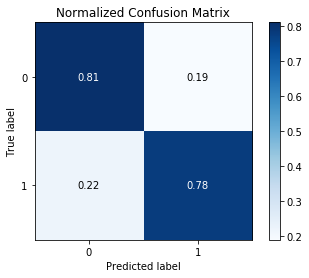

In [118]:
from sklearn  import metrics
print('training accuracy=',(metrics.accuracy_score (y_test,y_pred1))*100)
print(metrics.classification_report(y_test, y_pred1))
import scikitplot as skplt
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred1)
print(cm)
skplt.metrics.plot_confusion_matrix(y_test,y_pred1, normalize=True)
plt.show()

1862/1862 [==============================] - 0s 59us/step


(0, 1)

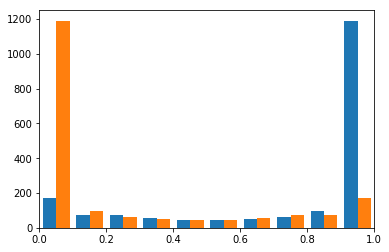

In [120]:
#we can seethe probability of the predicted values
y_pred=model_pred.predict_proba(x_test)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=10
#histogram
plt.hist(y_pred,bins=10)
plt.xlim(0,1)

In [121]:
#Feature selection
from sklearn.ensemble import RandomForestClassifier

names = df1.columns
rf = RandomForestClassifier().fit(x_train,y_train)
rf.fit(x_train,y_train)
#print ("Features sorted by their score:")
#print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_),names),reverse=True))
importances = pd.DataFrame({'feature':x.columns,'importance':np.round(rf.feature_importances_,4)*100})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances
#importances.plot.bar()

,importance
feature,
inflow avg_6m,17.62
casa_inflow_456m,10.34
Gross_Annual_Income,7.45
inflow_behav_change,6.97
SCV_Party_ID,5.81
inflow avg_3m,5.73
casa_outflow_456m,4.70
No_of_Prod_Held_BW,4.42
casa_inflow_123m,4.31


1862/1862 [==============================] - 0s 50us/step


C:\Users\tvimal\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


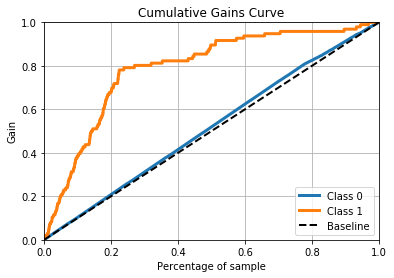

C:\Users\tvimal\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


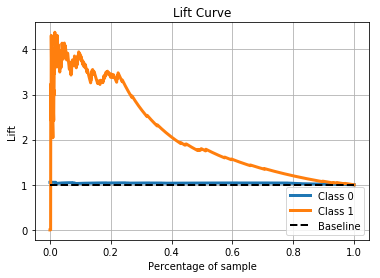

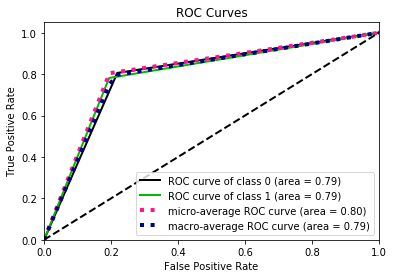

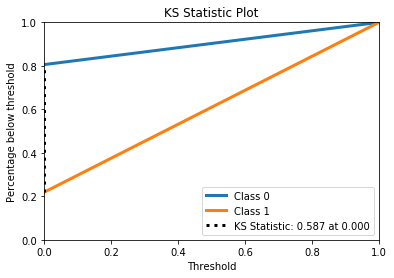

In [122]:
import matplotlib.pyplot as plt
import scikitplot as skplt
prediction = model_pred.predict(x_test)
prob=prediction[:,0]

newprob=prob>0.50
y_pred1=newprob*1
y_pred1.ravel()
y_pred=y_pred1

out=pd.Series(y_pred)
out
out2=pd.Series(np.ones(len(out)))
out2
dd=pd.concat([out, out2], axis=1)
dd
dd2= dd[1] - dd[0]
dd2
dd3=pd.concat([dd2,dd],ignore_index=True, axis=1)
dd3
dd4=dd3.drop(2,axis=1)
dd4
y_pred=dd4.values
y_pred

skplt.metrics.plot_cumulative_gain(y_test,y_pred)
plt.show()
skplt.metrics.plot_lift_curve(y_test,y_pred)
plt.show()
skplt.metrics.plot_roc (y_test,y_pred,plot_micro='off',plot_macro='off',)
skplt.metrics.plot_ks_statistic(y_test,y_pred)
plt.show()

1862/1862 [==============================] - 0s 59us/step


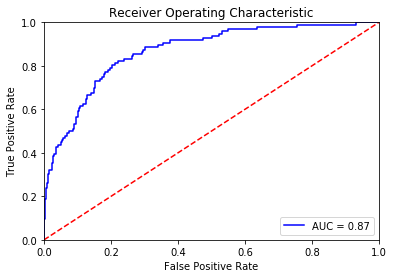

In [123]:
from sklearn  import metrics
import matplotlib.pyplot as plt
probs =model_pred.predict_proba(x_test)
y_pred = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f'%roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

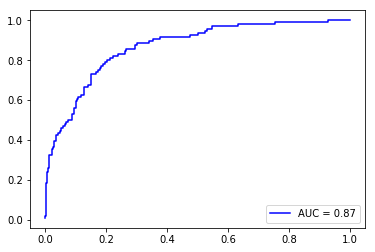

In [127]:
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f'%roc_auc)
plt.legend(loc = 'lower right')


In [129]:
y_pred=model_pred.predict(x_test)
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

1862/1862 [==============================] - 0s 42us/step


0.29182879377431903

Epoch 1/5
372/372 [==============================] - 0s 852us/step - loss: 4.0496 - acc: 0.7796
Epoch 2/5
372/372 [==============================] - 0s 174us/step - loss: 1.4177 - acc: 0.9624
Epoch 3/5
372/372 [==============================] - 0s 146us/step - loss: 0.4529 - acc: 0.9624
Epoch 4/5
372/372 [==============================] - 0s 222us/step - loss: 0.2373 - acc: 0.9624
Epoch 5/5
372/372 [==============================] - 0s 49us/step
Epoch 1/5
1210/1210 [==============================] - 1s 425us/step - loss: 1.8043 - acc: 0.9331
Epoch 2/5
1210/1210 [==============================] - 0s 163us/step - loss: 0.1873 - acc: 0.9645
Epoch 3/5
1210/1210 [==============================] - 0s 197us/step - loss: 0.1749 - acc: 0.9645
Epoch 4/5
1210/1210 [==============================] - 0s 178us/step - loss: 0.1755 - acc: 0.9645
Epoch 5/5
1210/1210 [==============================] - 0s 66us/step
Epoch 1/5
2048/2048 [==============================] - 1s 375us/step - loss: 1.1331 - acc:

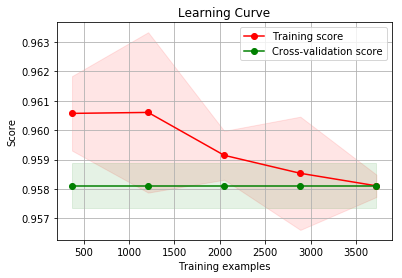

In [130]:
skplt.estimators.plot_learning_curve(model_pred, x_train,y_train)
plt.show()

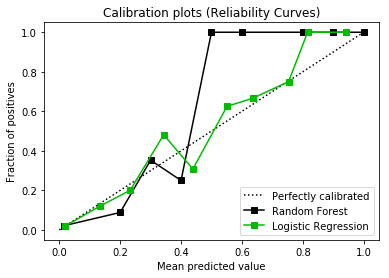

In [132]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import scikitplot as skplt
rf = RandomForestClassifier()
lr = LogisticRegression()
#nb = GaussianNB()
#svm = LinearSVC()

rf_probas = rf.fit(x_train, y_train).predict_proba(x_test)
lr_probas = lr.fit(x_train, y_train).predict_proba(x_test)
#nb_probas = nb.fit(x_train, y_train).predict_proba(X_test)
#svm_scores = svm.fit(x_train, y_train).decision_function(X_test)
probas_list = [rf_probas, lr_probas]
clf_names = ['Random Forest', 'Logistic Regression']
skplt.metrics.plot_calibration_curve(y_test,probas_list,clf_names)

plt.show()

C:\Users\tvimal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=DeprecationWarning)


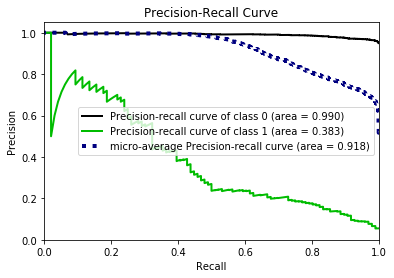

In [133]:
skplt.metrics.plot_precision_recall_curve(y_test, probs)
plt.show()

In [135]:
gini_index=2*87# roc value
gini_index

174

#save the model and use it for prediction

In [154]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("model Saved  to this working directory") 

model Saved  to this working directory


In [155]:
from keras.models import model_from_json
# load json and create model
json_file = open('model.json', 'r')

loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

In [156]:
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [211]:
backtest_data=pd.read_excel('C:\\Users\\tvimal\\Desktop\\EtoE\\backtest_data2500.xlsx')
score_data=backtest_data.drop(['SCV_Party_ID','Open_PL_Jul17Jun18'],axis=1)
score_data=score_data.replace(np.nan,0)
score_data=score_data.replace(np.inf,0)
score_data=score_data.replace(-np.inf,0)
actual_output=backtest_data['Open_PL_Jul17Jun18']

In [214]:
score_data=pd.get_dummies(score_data)
score_data.shape

(2500, 66)

In [215]:
# Get missing columns in the training test
missing_cols = set( x.columns ) - set( score_data.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    score_data[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
score_data = score_data[x.columns]

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
score_data=sc.fit_transform(score_data)
print("backtest input shape",score_data.shape)

backtest input shape (2500, 68)


In [226]:
score = loaded_model.predict_proba(score_data)
score1=score>0.05
score2=score1*1
score2=score2.ravel()
predicted_score=score.ravel()



In [1]:
pwd

'C:\\Users\\tvimal\\Desktop\\pythonn\\NN EtoE'

In [227]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(actual_output,score2)
print(cm)

[[1918  476]
 [  41   65]]


In [228]:
PL_Casa_BASE_LEADS=pd.DataFrame({'Party_ID':backtest_data['SCV_Party_ID'],'Model_Probability':prob,'Target':score2})
PL_Casa_BASE_LEADS = PL_Casa_BASE_LEADS.sort_values(by=['Model_Probability'], ascending=[False])
PL_Casa_BASE_LEADS = PL_Casa_BASE_LEADS.reset_index(drop=True)
PL_Casa_BASE_LEADS

,Party_ID,Model_Probability,Target
0,11051911,9.799516e-01,1
1,10947180,9.791778e-01,1
2,10090826,9.791724e-01,1
3,25729409,9.787762e-01,1
4,21041726,9.754568e-01,1
5,42462208,9.743737e-01,1
6,11522070,9.738873e-01,1
7,1987365,9.732111e-01,1
8,38865743,9.718392e-01,1
9,4291960,9.718025e-01,1


In [206]:
PL_Casa_BASE_LEADS.to_excel('C:\\Users\\tvimal\\Desktop\\EtoE\\new_scored_data.xlsx')